In [1]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

KeyboardInterrupt: 

In [ ]:
data = pd.read_csv("Data/train.csv")
target = pd.read_csv("Data/test.csv")
train,test = train_test_split(data,test_size = 0.2,random_state=2137)
y_train = train["label"]
X_train = train.drop("label",axis=1)
y_test = test["label"]
X_test = test.drop("label",axis=1)

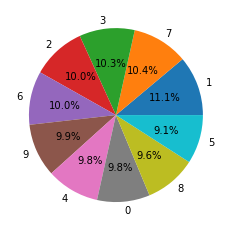

In [ ]:
plt.pie(y_train.value_counts(),labels = y_train.value_counts().keys(),autopct='%1.1f%%')
plt.show()

Sample shape:  (28, 28)


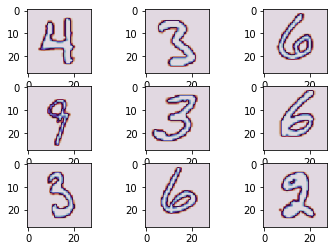

In [ ]:
X_train = np.array(X_train)/255
y_train = np.array(y_train)
X_test = np.array(X_test)/255
y_test = np.array(y_test)
target = np.array(target)/255

X_train = np.array([i.reshape((28,28)) for i in X_train])
X_test = np.array([i.reshape((28,28)) for i in X_test])
target = np.array([i.reshape((28,28)) for i in target])


print("Sample shape: ",X_train[0].shape)

for i in range(0,9):
    plt.subplot(3,3,1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('twilight_r'))
plt.show()

In [ ]:
from tensorflow import keras
from keras.layers import Input,Dense,Dropout,Flatten,MaxPooling2D,Conv2D
from keras import metrics, Model

def create_model(lr,drop):
    inp = Input(shape = (28,28,1),name = "input")

    x = Conv2D(16, kernel_size=(3,3), activation="relu")(inp)
    x = Conv2D(32, kernel_size=(3,3), activation="relu")(x)
    
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x = Flatten()(x)
    x = Dense(units = 256, activation="relu")(x)
    
    x = Dropout(drop, name = "dropout")(x)
    
    x = Dense(units = 10, activation="softmax",name="output")(x)
    
    optimizer = keras.optimizers.Adam(learning_rate = lr)
    loss = "sparse_categorical_crossentropy"
    
    model = Model(inp,x, name = "digit_detector")
    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = [
            "accuracy"
        ]
    )
    return model

def train_model(model,x,y,epochs,batch_size,validation_split):
    history = model.fit(
        x = x,
        y = y,
        epochs = epochs,
        batch_size = batch_size,
        shuffle = True,
        validation_split = validation_split
    )
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

def plot_output(epochs,hist,list_of_metrics):
    plt.figure(figsize=(10,5))
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

Epoch 1/50
27/27 [==============================] - 16s 591ms/step - loss: 1.0556 - accuracy: 0.6445 - val_loss: 0.1545 - val_accuracy: 0.9534
Epoch 2/50
27/27 [==============================] - 14s 538ms/step - loss: 0.1790 - accuracy: 0.9475 - val_loss: 0.0768 - val_accuracy: 0.9760
Epoch 3/50
27/27 [==============================] - 14s 525ms/step - loss: 0.0955 - accuracy: 0.9713 - val_loss: 0.0573 - val_accuracy: 0.9824
Epoch 4/50
27/27 [==============================] - 14s 519ms/step - loss: 0.0686 - accuracy: 0.9795 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 5/50
27/27 [==============================] - 14s 533ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0457 - val_accuracy: 0.9866
Epoch 6/50
27/27 [==============================] - 14s 515ms/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.0399 - val_accuracy: 0.9868
Epoch 7/50
27/27 [==============================] - 14s 519ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0441 - val_accuracy: 0.9875

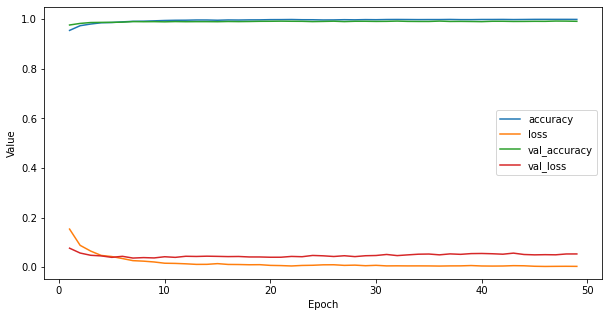

In [ ]:
learning_rate =  0.003
dropout = 0.5
batch_size = 1024
epochs = 50
validation_split = 0.2
model = create_model(learning_rate,dropout)
epochs, hist = train_model(model,X_train,y_train,epochs,batch_size,validation_split)

plot_output(epochs,hist,["accuracy","loss","val_accuracy","val_loss"])

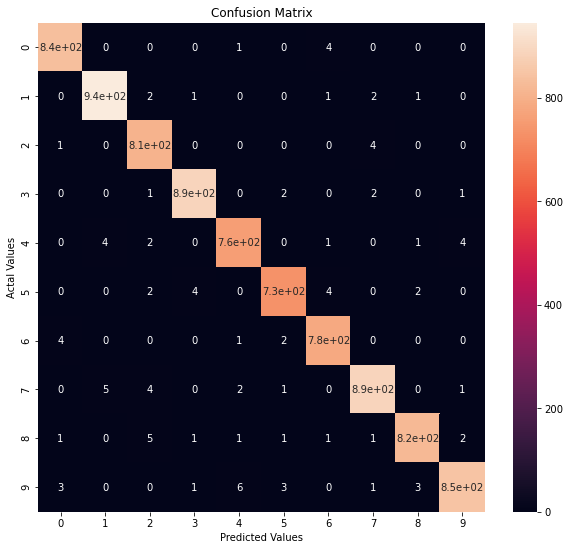

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_softmax = model.predict(X_test)
predictions = [np.argmax(i) for i in predictions_softmax]

cm = pd.DataFrame(confusion_matrix(y_test,predictions))
plt.figure(figsize=(10,9))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from datetime import datetime
predictions_softmax = model.predict(target)
predictions = [np.argmax(i) for i in predictions_softmax]

df = pd.DataFrame(predictions,columns=["Label"])
df.index.name = 'ImageId'
df.index += 1
now = datetime.now()
now = now.strftime("%Y.%m.%d.%H.%M")
df.to_csv("Predictions/{}.csv".format(now))